## ANALYZING TEXTUAL DATA
from Python Data Analysis by Avinash Navlani, Armando Fandango, Ivan Idris

El objetivo principal de este notebook es obtener una visión general del Procesamiento del Lenguaje Natural (Natural Language Processing - NLP).

NLP comprende el preprocesamiento de textos, el análisis de sentimientos y la similitud de textos utilizando NLTK y SpaCy.

En la era de la información, los datos se producen a velocidades y volúmenes increíbles. Los datos producidos no sólo son de tipo estructurado o tabular, sino que también pueden ser de diversos tipos no estructurados, como datos textuales, datos de imágenes o gráficos, datos de voz y video.

El texto es un tipo de datos muy común y rico. Los artículos, los blogs, los tutoriales, las publicaciones en las redes sociales y el contenido de los sitios web producen datos textuales no estructurados. La gente envía miles de correos electrónicos, mensajes, comentarios y tweets cada minuto. Esta gran cantidad de datos textuales necesita ser explotada. La analítica de textos ofrece muchas oportunidades a las empresas; por ejemplo, Amazon puede interpretar los comentarios de los clientes sobre un determinado producto, los analistas de noticias pueden analizar las tendencias de las noticias y los últimos temas en Twitter, y Netflix también puede interpretar las críticas de cada película y serie. 

Temas que se cubrirán en este notebook: operaciones básicas de análisis de texto, como la tokenización, la eliminación de palabras vacías (stopwords), el stemming, la lematización, el etiquetado PoS y el reconocimiento de entidades. Se profundizará en entender las opiniones de los clientes sobre un producto basándonos en las reseñas, utilizando el análisis de sentimientos. En este caso, realizaremos el análisis de sentimientos mediante la clasificación de textos y evaluaremos el rendimiento del modelo mediante la exactitud, la precisión, el recuerdo y la puntuación f1. Por último, nos centraremos en la similitud del texto entre dos frases utilizando la similitud de Jaccard y del coseno.

### Installing NLTK and SpaCy

NLTK es uno de los paquetes de Python más populares y esenciales para el procesamiento del lenguaje natural. Ofrece todas las operaciones básicas y avanzadas de NLP. Comprende algoritmos comunes como la tokenización, el stemming, la lematización, el part-of-speech y el reconocimiento de entidades con nombre. 

La biblioteca NLTK puede instalarse mediante el comando !pip install que se ejecuta en el Jupyter Notebook:

In [1]:
#!pip install nltk

SpaCy es otro paquete de Python esencial y potente para la NLP. Está diseñado para fines de producción y desarrolla aplicaciones para un gran volumen de datos. La biblioteca SpaCy se puede instalar mediante el comando !pip install:

In [2]:
#!pip install spacy

Después de instalar spaCy, se necesita instalar un modelo de spacy en inglés (o español):

In [3]:
#!python -m spacy download en
# !python -m spacy download 'en_core_web_sm'

### Normalización del texto

La normalización del texto lo convierte en una forma estándar o canónica. Garantiza la coherencia y ayuda en el procesamiento y el análisis. No existe un único enfoque para el proceso de normalización. El primer paso en la normalización es poner en minúsculas todo el texto. Es el método más sencillo, aplicable y eficaz para el preprocesamiento del texto. 

Otro enfoque podría ser el tratamiento de las palabras mal escritas, los acrónimos, las formas cortas y el uso de palabras fuera de vocabulario; por ejemplo, "super", "superb" y "superrrr" pueden convertirse en "super". 

La normalización del texto se ocupa del ruido y las perturbaciones de los datos de prueba y prepara datos sin ruido. También aplicamos la normalización de la raíz y la lematización para normalizar las palabras presentes en el texto.

In [4]:
import csv 
file = open(r"notebooks.txt", encoding='utf8')
macbeth = csv.reader(file)
paragraph = ''
for i in macbeth:
    for x in i:
        paragraph+= (str(x)) 
print(paragraph)

﻿The Project Gutenberg eBook of Macbeth by William ShakespeareThis eBook is for the use of anyone anywhere in the United States andmost other parts of the world at no cost and with almost no restrictionswhatsoever. You may copy it give it away or re-use it under the termsof the Project Gutenberg License included with this eBook or online atwww.gutenberg.org. If you are not located in the United States youwill have to check the laws of the country where you are located beforeusing this eBook.Title: MacbethAuthor: William ShakespeareRelease Date: November 1998 [eBook #1533][Most recently updated: April 25 2021]Language: EnglishCharacter set encoding: UTF-8Produced by: the PG Shakespeare Team a team of about twenty Project Gutenberg volunteers.*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***cover MACBETHby William ShakespeareContentsACT IScene I. An open Place.Scene II. A Camp near Forres.Scene III. A heath.Scene IV. Forres. A Room in the Palace.Scene V. Inverness. A Room in Macbeth’s

In [5]:
# Vamos a realizar una operación básica de normalización convirtiendo el texto en minúsculas:
# Input text
# paragraph="""     Taj Mahal is one of the 13's most beautiful monuments of the country. It's one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.    """
#paragraph

In [6]:
# Converting paragraph in lowercase
paragraph_lower = paragraph.lower()
print(paragraph_lower)

﻿the project gutenberg ebook of macbeth by william shakespearethis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever. you may copy it give it away or re-use it under the termsof the project gutenberg license included with this ebook or online atwww.gutenberg.org. if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebook.title: macbethauthor: william shakespearerelease date: november 1998 [ebook #1533][most recently updated: april 25 2021]language: englishcharacter set encoding: utf-8produced by: the pg shakespeare team a team of about twenty project gutenberg volunteers.*** start of the project gutenberg ebook macbeth ***cover macbethby william shakespearecontentsact iscene i. an open place.scene ii. a camp near forres.scene iii. a heath.scene iv. forres. a room in the palace.scene v. inverness. a room in macbeth’s

¿Qué otras operaciones de normalización se pueden realizar?

* Si los números son esenciales para convertirlos en palabras, elimine todos los números
* Eliminar las puntuaciones, otras formalidades de la gramática
* Eliminar los espacios en blanco
* Eliminar los stopwords
* Expandir las contracciones
* Cualquier otro cálculo.

In [7]:
# import regex
import re

In [8]:
# remove numbers
no_number_string = re.sub(r'\d+','',paragraph_lower)
print(no_number_string)

﻿the project gutenberg ebook of macbeth by william shakespearethis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever. you may copy it give it away or re-use it under the termsof the project gutenberg license included with this ebook or online atwww.gutenberg.org. if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebook.title: macbethauthor: william shakespearerelease date: november  [ebook #][most recently updated: april  ]language: englishcharacter set encoding: utf-produced by: the pg shakespeare team a team of about twenty project gutenberg volunteers.*** start of the project gutenberg ebook macbeth ***cover macbethby william shakespearecontentsact iscene i. an open place.scene ii. a camp near forres.scene iii. a heath.scene iv. forres. a room in the palace.scene v. inverness. a room in macbeth’s castle.scene v

In [9]:
# remove contractions
contractions_dict = { "ain't": "are not", "'s":" is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "‘cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "that'd": "that would", "that'd've": "that would have", "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will",
 "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not","what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", "where'd": "where did", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who've": "who have", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [10]:
contractions_dict

{"ain't": 'are not',
 "'s": ' is',
 "aren't": 'are not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 '‘cause': 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'd've": 'he would have',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn'

In [11]:
contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [12]:
no_number_string = expand_contractions(no_number_string)
print(no_number_string)

﻿the project gutenberg ebook of macbeth by william shakespearethis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever. you may copy it give it away or re-use it under the termsof the project gutenberg license included with this ebook or online atwww.gutenberg.org. if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebook.title: macbethauthor: william shakespearerelease date: november  [ebook #][most recently updated: april  ]language: englishcharacter set encoding: utf-produced by: the pg shakespeare team a team of about twenty project gutenberg volunteers.*** start of the project gutenberg ebook macbeth ***cover macbethby william shakespearecontentsact iscene i. an open place.scene ii. a camp near forres.scene iii. a heath.scene iv. forres. a room in the palace.scene v. inverness. a room in macbeth’s castle.scene v

In [13]:
# remove all punctuation except words and space
no_punc_string = re.sub(r'[^\w\s]','', no_number_string)
print(no_punc_string)

the project gutenberg ebook of macbeth by william shakespearethis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever you may copy it give it away or reuse it under the termsof the project gutenberg license included with this ebook or online atwwwgutenbergorg if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebooktitle macbethauthor william shakespearerelease date november  ebook most recently updated april  language englishcharacter set encoding utfproduced by the pg shakespeare team a team of about twenty project gutenberg volunteers start of the project gutenberg ebook macbeth cover macbethby william shakespearecontentsact iscene i an open placescene ii a camp near forresscene iii a heathscene iv forres a room in the palacescene v inverness a room in macbeths castlescene vi the same before the castlescene vii th

In [14]:
# remove white spaces
no_wspace_string = no_punc_string.strip()
print(no_wspace_string)

the project gutenberg ebook of macbeth by william shakespearethis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever you may copy it give it away or reuse it under the termsof the project gutenberg license included with this ebook or online atwwwgutenbergorg if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebooktitle macbethauthor william shakespearerelease date november  ebook most recently updated april  language englishcharacter set encoding utfproduced by the pg shakespeare team a team of about twenty project gutenberg volunteers start of the project gutenberg ebook macbeth cover macbethby william shakespearecontentsact iscene i an open placescene ii a camp near forresscene iii a heathscene iv forres a room in the palacescene v inverness a room in macbeths castlescene vi the same before the castlescene vii th

Las "stop words" son las más comunes en un idioma como "el", "a", "en", "es", "todo". Estas palabras no tienen un significado importante. Es posible deshacerse de las stopwords utilizando NLTK.

In [15]:
# download stpwords
import nltk

In [16]:
#nltk.download('stopwords')

In [17]:
# import nltk for stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [18]:
print(stop_words)

{'in', "you'll", "shan't", 'of', 'when', 'both', 'shan', 'she', 's', 'how', "you're", 'then', 'll', 'few', 'this', 'had', 'wouldn', 'shouldn', 'under', 'my', 'y', "doesn't", 'him', "wasn't", 'mightn', 'any', "don't", 'but', "won't", 'did', "weren't", 'couldn', 'me', 'don', 'some', 'out', 'here', 'haven', 'are', 'nor', 'aren', "isn't", 'hers', 'what', 'through', 'ma', 'theirs', 'over', "mightn't", "mustn't", 'into', 'on', 'between', 'during', 'before', 'needn', 'too', 'your', 'above', 'that', 'most', 'if', 'his', 'very', "wouldn't", 'by', 'does', "hadn't", 'their', "you'd", 'yourself', 'than', 'ain', 'its', 'for', 'while', 'not', 'whom', 'more', "should've", 'such', 'once', 'm', 'all', 'own', 'weren', 'himself', 'until', 'themselves', "couldn't", 'an', 'who', 'up', "didn't", 'just', 'hadn', 'only', 'about', 'and', "needn't", 'or', 'after', 'can', 'doesn', 'being', 'isn', 'off', "she's", "haven't", 'am', 'been', 'herself', 'mustn', 'yourselves', 'was', 'should', "aren't", 'will', 're', '

In [19]:
# convert string to list of words
lst_string = [no_wspace_string][0].split()
print(lst_string)

['the', 'project', 'gutenberg', 'ebook', 'of', 'macbeth', 'by', 'william', 'shakespearethis', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'andmost', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictionswhatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'reuse', 'it', 'under', 'the', 'termsof', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'atwwwgutenbergorg', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', 'youwill', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'beforeusing', 'this', 'ebooktitle', 'macbethauthor', 'william', 'shakespearerelease', 'date', 'november', 'ebook', 'most', 'recently', 'updated', 'april', 'language', 'englishcharacter', 'set', 'encoding', 'utfproduced', 'by', 'the', 'pg', 'shakespeare', 'team', 'a', 'team', 'of', 'about

In [20]:
# remove stopwords
no_stpwords_string=""
for i in lst_string:
    if not i in stop_words:
        no_stpwords_string += i+' '
         
# removing last space
no_stpwords_string = no_stpwords_string[:-1]
 
# output
print(no_stpwords_string)

project gutenberg ebook macbeth william shakespearethis ebook use anyone anywhere united states andmost parts world cost almost restrictionswhatsoever may copy give away reuse termsof project gutenberg license included ebook online atwwwgutenbergorg located united states youwill check laws country located beforeusing ebooktitle macbethauthor william shakespearerelease date november ebook recently updated april language englishcharacter set encoding utfproduced pg shakespeare team team twenty project gutenberg volunteers start project gutenberg ebook macbeth cover macbethby william shakespearecontentsact iscene open placescene ii camp near forresscene iii heathscene iv forres room palacescene v inverness room macbeths castlescene vi castlescene vii lobby castleact iiscene inverness court within castlescene ii samescene iii samescene iv without castleact iiiscene forres room palacescene ii another room palacescene iii park lawn gate leading palacescene iv room state palacescene v heathsc

### Tokenization

La tokenización es el paso inicial del análisis de textos. La tokenización se define como la división de los párrafos del texto en partes más pequeñas o tokens, como frases o palabras, ignorando los signos de puntuación. La tokenización puede ser de dos tipos: tokenización de frases y tokenización de palabras. Un tokenizador de frases divide un párrafo en frases y la tokenización de palabras divide un texto en palabras o tokens.

Para tokenizar un párrafo se necesita NLTK y spaCy.

#### Let's tokenize paragraphs into words using the word_tokenize() function of NLTK:

In [21]:
#nltk.download('punkt')

In [22]:
# Import nltk word_tokenize method
from nltk.tokenize import word_tokenize

# Split paragraph into words
tokenized_words=word_tokenize(no_wspace_string)
print(tokenized_words)

['the', 'project', 'gutenberg', 'ebook', 'of', 'macbeth', 'by', 'william', 'shakespearethis', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'andmost', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictionswhatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'reuse', 'it', 'under', 'the', 'termsof', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'atwwwgutenbergorg', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', 'youwill', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'beforeusing', 'this', 'ebooktitle', 'macbethauthor', 'william', 'shakespearerelease', 'date', 'november', 'ebook', 'most', 'recently', 'updated', 'april', 'language', 'englishcharacter', 'set', 'encoding', 'utfproduced', 'by', 'the', 'pg', 'shakespeare', 'team', 'a', 'team', 'of', 'about

#### Let's tokenize the paragraph into words using spaCy:

Para este caso, primero se importa el modelo de lengua inglesa y se instancia. A continuación, se crea un párrafo de texto. Por último, se crea el objeto NLP utilizando párrafos de texto y se itera para crear una lista de palabras tokenizadas.

In [23]:
# Import spacy
import spacy

# Loading english language model
nlp = spacy.load("en_core_web_sm")

2021-12-15 23:11:38.992876: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-15 23:11:38.992899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [24]:
# Create nlp Object to handle linguistic annotations in a documents.

my_doc = nlp(no_wspace_string)

# tokenize paragraph into words

tokenized_words = []
for token in my_doc:
    tokenized_words.append(token.text)

print(tokenized_words)

['the', 'project', 'gutenberg', 'ebook', 'of', 'macbeth', 'by', 'william', 'shakespearethis', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'andmost', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictionswhatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'reuse', 'it', 'under', 'the', 'termsof', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'atwwwgutenbergorg', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', 'youwill', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'beforeusing', 'this', 'ebooktitle', 'macbethauthor', 'william', 'shakespearerelease', 'date', 'november', ' ', 'ebook', 'most', 'recently', 'updated', 'april', ' ', 'language', 'englishcharacter', 'set', 'encoding', 'utfproduced', 'by', 'the', 'pg', 'shakespeare', 'team', 'a', 'team', 'o

### Let's create the frequency distribution of tokenized words:

In [25]:
# Import frequency distribution
from nltk.probability import FreqDist

In [26]:
# Find frequency distribution of paragraph
fdist = FreqDist(tokenized_words)

# Check top 5 common words
fdist.most_common(5)

[('the', 775), ('and', 474), ('of', 444), ('to', 385), ('a', 301)]

### Let's create a frequency distribution plot using matplotlib:

In [27]:
# Import matplotlib
import matplotlib.pyplot as plt

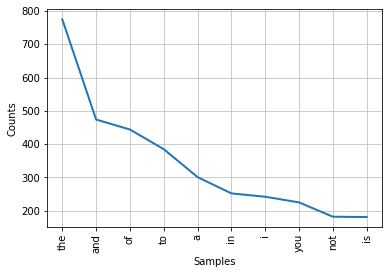

In [28]:
# Plot Frequency Distribution
fdist.plot(10, cumulative=False)
plt.show()

##### Let's see how to remove stopwords using spaCy:

In [29]:
# Anteriormente fueron importados

# import spacy

# Loading english language model
# nlp = spacy.load("en")

In [30]:
# Create nlp Object to handle linguistic annotations in a documents.
# Ojo con la variable de texto que se le está pasando
my_doc = nlp(no_wspace_string)

# Removing stopwords from text
filtered_token_list = []
for token in my_doc:
# filter stopwords
    if token.is_stop==False:
        filtered_token_list.append(token)

print("Filtered Word List:",filtered_token_list)

Filtered Word List: [project, gutenberg, ebook, macbeth, william, shakespearethis, ebook, use, united, states, andmost, parts, world, cost, restrictionswhatsoever, copy, away, reuse, termsof, project, gutenberg, license, included, ebook, online, atwwwgutenbergorg, located, united, states, youwill, check, laws, country, located, beforeusing, ebooktitle, macbethauthor, william, shakespearerelease, date, november,  , ebook, recently, updated, april,  , language, englishcharacter, set, encoding, utfproduced, pg, shakespeare, team, team, project, gutenberg, volunteers, start, project, gutenberg, ebook, macbeth, cover, macbethby, william, shakespearecontentsact, iscene, open, placescene, ii, camp, near, forresscene, iii, heathscene, iv, forres, room, palacescene, v, inverness, room, macbeths, castlescene, vi, castlescene, vii, lobby, castleact, iiscene, inverness, court, castlescene, ii, samescene, iii, samescene, iv, castleact, iiiscene, forres, room, palacescene, ii, room, palacescene, iii

En el ejemplo anterior, primero se importan las stopwords y después, se itera el objeto NLP utilizando un bucle for y se filtra cada palabra con la propiedad "is_stop" de la lista de stopwords utilizando la condición if. Añadimos las palabras filtradas a la lista fltered_token_list. 

### Stemming and lemmatization

El "stemming" es otro paso en el análisis de textos para la normalización a nivel lingüístico. El proceso de stemming sustituye una palabra por su raíz. Elimina los prefijos y sufijos. Por ejemplo, la palabra "connect" es la raíz de "connecting", "connected" y "connection". Todas las palabras mencionadas tienen una raíz común: connect. Estas diferencias entre las grafías de las palabras dificultan el análisis de los datos del texto.

La lematización es otro tipo de normalización del léxico, que convierte una palabra en su raíz. Está estrechamente relacionada con la stemming. La principal diferencia es que la lematización tiene en cuenta el contexto de la palabra mientras se realiza la normalización, pero el stemmer no tiene en cuenta el conocimiento contextual de la palabra. La lematización es más sofisticada que el stemmer. Por ejemplo, la palabra "gansos" se lematiza como "ganso". La lematización reduce las palabras a su lema válido utilizando un diccionario. La lematización tiene en cuenta la parte de la oración cercana a las palabras para la normalización; por eso es difícil de implementar y más lenta, mientras que los stemmers son más fáciles de implementar y más rápidos, pero con menos precisión.

In [31]:
from IPython.display import Image
#Image(filename='stem.png') 

In [32]:
#Image(filename='lemm.png') 

Stemming se limita a eliminar o cortar los últimos caracteres de una palabra, lo que a menudo da lugar a significados y ortografías incorrectos. Lemmatization tiene en cuenta el contexto y convierte la palabra en su forma base significativa, que se denomina lema. A veces, una misma palabra puede tener varios lemas diferentes. 

Lemmatization es costosa desde el punto de vista computacional, ya que implica tablas de búsqueda y demás. Si tiene un gran conjunto de datos y el rendimiento es un problema, opte por la Stemming. Si la precisión es primordial y el conjunto de datos no es enorme, opte por Lemmatization.

#### Let's see how to get stemmed and lemmatized using NLTK:

In [33]:
# Import Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer

# Import Porter Stemmer
from nltk.stem.porter import PorterStemmer

#nltk.download('wordnet')

In [34]:
# Create lemmatizer object
lemmatizer = WordNetLemmatizer()

# Create stemmer object
stemmer = PorterStemmer()

In [35]:
# take a sample word
sample_word_1 = "crying"
print("Sample Word 1:", sample_word_1)
print("Lemmatized Sample Word 1:", lemmatizer.lemmatize(sample_word_1, "v"))
print("Stemmed Sample Word 1:", stemmer.stem(sample_word_1))
print("\n")

sample_word_2 = "cries"
print("Sample Word 2:", sample_word_2)
print("Lemmatized Sample Word 2:", lemmatizer.lemmatize(sample_word_2, "v"))
print("Stemmed Sample Word 2:", stemmer.stem(sample_word_2))
print("\n")

sample_word_3 = "running"
print("Sample Word 3:", sample_word_3)
print("Lemmatized Sample Word 3:", lemmatizer.lemmatize(sample_word_3, "v"))
print("Stemmed Sample Word 3:", stemmer.stem(sample_word_3))
print("\n")

Sample Word 1: crying
Lemmatized Sample Word 1: cry
Stemmed Sample Word 1: cri


Sample Word 2: cries
Lemmatized Sample Word 2: cry
Stemmed Sample Word 2: cri


Sample Word 3: running
Lemmatized Sample Word 3: run
Stemmed Sample Word 3: run




#### Let's see how to get stemmed and lemmatized using spaCy:

In [36]:
# Create nlp Object to handle linguistic annotations in documents.
words = nlp(paragraph)

# Find lemmatized word
for w in words:
    print('Original Word: ', w.text)
    print('Lemmatized Word: ',w.lemma_)

Original Word:  ﻿The
Lemmatized Word:  ﻿the
Original Word:  Project
Lemmatized Word:  Project
Original Word:  Gutenberg
Lemmatized Word:  Gutenberg
Original Word:  eBook
Lemmatized Word:  eBook
Original Word:  of
Lemmatized Word:  of
Original Word:  Macbeth
Lemmatized Word:  Macbeth
Original Word:  by
Lemmatized Word:  by
Original Word:  William
Lemmatized Word:  William
Original Word:  ShakespeareThis
Lemmatized Word:  ShakespeareThis
Original Word:  eBook
Lemmatized Word:  ebook
Original Word:  is
Lemmatized Word:  be
Original Word:  for
Lemmatized Word:  for
Original Word:  the
Lemmatized Word:  the
Original Word:  use
Lemmatized Word:  use
Original Word:  of
Lemmatized Word:  of
Original Word:  anyone
Lemmatized Word:  anyone
Original Word:  anywhere
Lemmatized Word:  anywhere
Original Word:  in
Lemmatized Word:  in
Original Word:  the
Lemmatized Word:  the
Original Word:  United
Lemmatized Word:  United
Original Word:  States
Lemmatized Word:  States
Original Word:  andmost
Lemmat

Lemmatized Word:  Fortune
Original Word:  with
Lemmatized Word:  with
Original Word:  his
Lemmatized Word:  his
Original Word:  brandish’d
Lemmatized Word:  brandish’d
Original Word:  steelWhich
Lemmatized Word:  steelwhich
Original Word:  smok’d
Lemmatized Word:  smok’d
Original Word:  with
Lemmatized Word:  with
Original Word:  bloody
Lemmatized Word:  bloody
Original Word:  executionLike
Lemmatized Word:  executionlike
Original Word:  Valour
Lemmatized Word:  Valour
Original Word:  ’s
Lemmatized Word:  ’s
Original Word:  minion
Lemmatized Word:  minion
Original Word:  carv’d
Lemmatized Word:  carv’d
Original Word:  out
Lemmatized Word:  out
Original Word:  his
Lemmatized Word:  his
Original Word:  passageTill
Lemmatized Word:  passagetill
Original Word:  he
Lemmatized Word:  he
Original Word:  fac’d
Lemmatized Word:  fac’d
Original Word:  the
Lemmatized Word:  the
Original Word:  slave;Which
Lemmatized Word:  slave;which
Original Word:  ne’er
Lemmatized Word:  ne’er
Original Word:  

Lemmatized Word:  your
Original Word:  beards
Lemmatized Word:  beard
Original Word:  forbid
Lemmatized Word:  forbid
Original Word:  me
Lemmatized Word:  I
Original Word:  to
Lemmatized Word:  to
Original Word:  interpretThat
Lemmatized Word:  interpretthat
Original Word:  you
Lemmatized Word:  you
Original Word:  are
Lemmatized Word:  be
Original Word:  so
Lemmatized Word:  so
Original Word:  .
Lemmatized Word:  .
Original Word:  MACBETH.Speak
Lemmatized Word:  macbeth.speak
Original Word:  if
Lemmatized Word:  if
Original Word:  you
Lemmatized Word:  you
Original Word:  can;—what
Lemmatized Word:  can;—what
Original Word:  are
Lemmatized Word:  be
Original Word:  you?FIRST
Lemmatized Word:  you?first
Original Word:  WITCH.All
Lemmatized Word:  witch.all
Original Word:  hail
Lemmatized Word:  hail
Original Word:  Macbeth
Lemmatized Word:  Macbeth
Original Word:  !
Lemmatized Word:  !
Original Word:  hail
Lemmatized Word:  hail
Original Word:  to
Lemmatized Word:  to
Original Word:  t

Lemmatized Word:  rapt
Original Word:  .
Lemmatized Word:  .
Original Word:  MACBETH.[_Aside
Lemmatized Word:  MACBETH.[_Aside
Original Word:  .
Lemmatized Word:  .
Original Word:  _
Lemmatized Word:  _
Original Word:  ]
Lemmatized Word:  ]
Original Word:  If
Lemmatized Word:  if
Original Word:  chance
Lemmatized Word:  chance
Original Word:  will
Lemmatized Word:  will
Original Word:  have
Lemmatized Word:  have
Original Word:  me
Lemmatized Word:  I
Original Word:  king
Lemmatized Word:  king
Original Word:  why
Lemmatized Word:  why
Original Word:  chance
Lemmatized Word:  chance
Original Word:  may
Lemmatized Word:  may
Original Word:  crown
Lemmatized Word:  crown
Original Word:  meWithout
Lemmatized Word:  meWithout
Original Word:  my
Lemmatized Word:  my
Original Word:  stir
Lemmatized Word:  stir
Original Word:  .
Lemmatized Word:  .
Original Word:  BANQUO.New
Lemmatized Word:  BANQUO.New
Original Word:  honours
Lemmatized Word:  honour
Original Word:  come
Lemmatized Word:  co

Lemmatized Word:  thoughtgood
Original Word:  to
Lemmatized Word:  to
Original Word:  deliver
Lemmatized Word:  deliver
Original Word:  thee
Lemmatized Word:  thee
Original Word:  (
Lemmatized Word:  (
Original Word:  my
Lemmatized Word:  my
Original Word:  dearest
Lemmatized Word:  dearest
Original Word:  partner
Lemmatized Word:  partner
Original Word:  of
Lemmatized Word:  of
Original Word:  greatness
Lemmatized Word:  greatness
Original Word:  )
Lemmatized Word:  )
Original Word:  that
Lemmatized Word:  that
Original Word:  thoumight’st
Lemmatized Word:  thoumight’st
Original Word:  not
Lemmatized Word:  not
Original Word:  lose
Lemmatized Word:  lose
Original Word:  the
Lemmatized Word:  the
Original Word:  dues
Lemmatized Word:  due
Original Word:  of
Lemmatized Word:  of
Original Word:  rejoicing
Lemmatized Word:  rejoice
Original Word:  by
Lemmatized Word:  by
Original Word:  being
Lemmatized Word:  be
Original Word:  ignorant
Lemmatized Word:  ignorant
Original Word:  of
Lemma

Lemmatized Word:  teachbloody
Original Word:  instructions
Lemmatized Word:  instruction
Original Word:  which
Lemmatized Word:  which
Original Word:  being
Lemmatized Word:  be
Original Word:  taught
Lemmatized Word:  teach
Original Word:  returnTo
Lemmatized Word:  returnTo
Original Word:  plague
Lemmatized Word:  plague
Original Word:  th
Lemmatized Word:  th
Original Word:  ’
Lemmatized Word:  '
Original Word:  inventor
Lemmatized Word:  inventor
Original Word:  .
Lemmatized Word:  .
Original Word:  This
Lemmatized Word:  this
Original Word:  even
Lemmatized Word:  even
Original Word:  -
Lemmatized Word:  -
Original Word:  handed
Lemmatized Word:  hand
Original Word:  justiceCommends
Lemmatized Word:  justicecommend
Original Word:  th
Lemmatized Word:  th
Original Word:  ’
Lemmatized Word:  '
Original Word:  ingredience
Lemmatized Word:  ingredience
Original Word:  of
Lemmatized Word:  of
Original Word:  our
Lemmatized Word:  our
Original Word:  poison’d
Lemmatized Word:  poison’d


Lemmatized Word:  upIn
Original Word:  measureless
Lemmatized Word:  measureless
Original Word:  content
Lemmatized Word:  content
Original Word:  .
Lemmatized Word:  .
Original Word:  MACBETH.Being
Lemmatized Word:  macbeth.bee
Original Word:  unprepar’dOur
Lemmatized Word:  unprepar’dOur
Original Word:  will
Lemmatized Word:  will
Original Word:  became
Lemmatized Word:  become
Original Word:  the
Lemmatized Word:  the
Original Word:  servant
Lemmatized Word:  servant
Original Word:  to
Lemmatized Word:  to
Original Word:  defectWhich
Lemmatized Word:  defectwhich
Original Word:  else
Lemmatized Word:  else
Original Word:  should
Lemmatized Word:  should
Original Word:  free
Lemmatized Word:  free
Original Word:  have
Lemmatized Word:  have
Original Word:  wrought
Lemmatized Word:  work
Original Word:  .
Lemmatized Word:  .
Original Word:  BANQUO.All
Lemmatized Word:  BANQUO.All
Original Word:  ’s
Lemmatized Word:  ’s
Original Word:  well
Lemmatized Word:  well
Original Word:  .
Lemm

Original Word:  of
Lemmatized Word:  of
Original Word:  the
Lemmatized Word:  the
Original Word:  grooms
Lemmatized Word:  groom
Original Word:  withalFor
Lemmatized Word:  withalFor
Original Word:  it
Lemmatized Word:  it
Original Word:  must
Lemmatized Word:  must
Original Word:  seem
Lemmatized Word:  seem
Original Word:  their
Lemmatized Word:  their
Original Word:  guilt
Lemmatized Word:  guilt
Original Word:  .
Lemmatized Word:  .
Original Word:  [
Lemmatized Word:  [
Original Word:  _
Lemmatized Word:  _
Original Word:  Exit
Lemmatized Word:  exit
Original Word:  .
Lemmatized Word:  .
Original Word:  Knocking
Lemmatized Word:  knock
Original Word:  within._]MACBETH.Whence
Lemmatized Word:  within._]macbeth.whence
Original Word:  is
Lemmatized Word:  be
Original Word:  that
Lemmatized Word:  that
Original Word:  knocking?How
Lemmatized Word:  knocking?How
Original Word:  is’t
Lemmatized Word:  is’t
Original Word:  with
Lemmatized Word:  with
Original Word:  me
Lemmatized Word:  I

Lemmatized Word:  macbeth.the
Original Word:  labour
Lemmatized Word:  labour
Original Word:  we
Lemmatized Word:  we
Original Word:  delight
Lemmatized Word:  delight
Original Word:  in
Lemmatized Word:  in
Original Word:  physics
Lemmatized Word:  physics
Original Word:  pain
Lemmatized Word:  pain
Original Word:  .
Lemmatized Word:  .
Original Word:  This
Lemmatized Word:  this
Original Word:  is
Lemmatized Word:  be
Original Word:  the
Lemmatized Word:  the
Original Word:  door
Lemmatized Word:  door
Original Word:  .
Lemmatized Word:  .
Original Word:  MACDUFF.I’ll
Lemmatized Word:  macduff.i’ll
Original Word:  make
Lemmatized Word:  make
Original Word:  so
Lemmatized Word:  so
Original Word:  bold
Lemmatized Word:  bold
Original Word:  to
Lemmatized Word:  to
Original Word:  call
Lemmatized Word:  call
Original Word:  .
Lemmatized Word:  .
Original Word:  For
Lemmatized Word:  for
Original Word:  ’
Lemmatized Word:  '
Original Word:  tis
Lemmatized Word:  tis
Original Word:  my
L

Lemmatized Word:  to
Original Word:  horse;And
Lemmatized Word:  horse;And
Original Word:  let
Lemmatized Word:  let
Original Word:  us
Lemmatized Word:  we
Original Word:  not
Lemmatized Word:  not
Original Word:  be
Lemmatized Word:  be
Original Word:  dainty
Lemmatized Word:  dainty
Original Word:  of
Lemmatized Word:  of
Original Word:  leave
Lemmatized Word:  leave
Original Word:  -
Lemmatized Word:  -
Original Word:  takingBut
Lemmatized Word:  takingbut
Original Word:  shift
Lemmatized Word:  shift
Original Word:  away
Lemmatized Word:  away
Original Word:  .
Lemmatized Word:  .
Original Word:  There
Lemmatized Word:  there
Original Word:  ’s
Lemmatized Word:  ’s
Original Word:  warrant
Lemmatized Word:  warrant
Original Word:  in
Lemmatized Word:  in
Original Word:  that
Lemmatized Word:  that
Original Word:  theftWhich
Lemmatized Word:  theftwhich
Original Word:  steals
Lemmatized Word:  steal
Original Word:  itself
Lemmatized Word:  itself
Original Word:  when
Lemmatized Word

Lemmatized Word:  valourto
Original Word:  act
Lemmatized Word:  act
Original Word:  in
Lemmatized Word:  in
Original Word:  safety
Lemmatized Word:  safety
Original Word:  .
Lemmatized Word:  .
Original Word:  There
Lemmatized Word:  there
Original Word:  is
Lemmatized Word:  be
Original Word:  none
Lemmatized Word:  none
Original Word:  but
Lemmatized Word:  but
Original Word:  heWhose
Lemmatized Word:  hewhose
Original Word:  being
Lemmatized Word:  be
Original Word:  I
Lemmatized Word:  I
Original Word:  do
Lemmatized Word:  do
Original Word:  fear
Lemmatized Word:  fear
Original Word:  :
Lemmatized Word:  :
Original Word:  and
Lemmatized Word:  and
Original Word:  under
Lemmatized Word:  under
Original Word:  himMy
Lemmatized Word:  himmy
Original Word:  genius
Lemmatized Word:  genius
Original Word:  is
Lemmatized Word:  be
Original Word:  rebuk’d
Lemmatized Word:  rebuk’d
Original Word:  ;
Lemmatized Word:  ;
Original Word:  as
Lemmatized Word:  as
Original Word:  it
Lemmatized 

Lemmatized Word:  his
Original Word:  son
Lemmatized Word:  son
Original Word:  that
Lemmatized Word:  that
Original Word:  keeps
Lemmatized Word:  keep
Original Word:  him
Lemmatized Word:  he
Original Word:  companyWhose
Lemmatized Word:  companywhose
Original Word:  absence
Lemmatized Word:  absence
Original Word:  is
Lemmatized Word:  be
Original Word:  no
Lemmatized Word:  no
Original Word:  less
Lemmatized Word:  less
Original Word:  material
Lemmatized Word:  material
Original Word:  to
Lemmatized Word:  to
Original Word:  meThan
Lemmatized Word:  methan
Original Word:  is
Lemmatized Word:  be
Original Word:  his
Lemmatized Word:  his
Original Word:  father
Lemmatized Word:  father
Original Word:  ’s
Lemmatized Word:  ’s
Original Word:  must
Lemmatized Word:  must
Original Word:  embrace
Lemmatized Word:  embrace
Original Word:  the
Lemmatized Word:  the
Original Word:  fateOf
Lemmatized Word:  fateOf
Original Word:  that
Lemmatized Word:  that
Original Word:  dark
Lemmatized Wo

Lemmatized Word:  .
Original Word:  BANQUO.[_Within
Lemmatized Word:  BANQUO.[_Within
Original Word:  .
Lemmatized Word:  .
Original Word:  _
Lemmatized Word:  _
Original Word:  ]
Lemmatized Word:  ]
Original Word:  Give
Lemmatized Word:  give
Original Word:  us
Lemmatized Word:  we
Original Word:  a
Lemmatized Word:  a
Original Word:  light
Lemmatized Word:  light
Original Word:  there
Lemmatized Word:  there
Original Word:  ho!SECOND
Lemmatized Word:  ho!second
Original Word:  MURDERER.Then
Lemmatized Word:  murderer.then
Original Word:  ’
Lemmatized Word:  '
Original Word:  tis
Lemmatized Word:  tis
Original Word:  he
Lemmatized Word:  he
Original Word:  ;
Lemmatized Word:  ;
Original Word:  the
Lemmatized Word:  the
Original Word:  restThat
Lemmatized Word:  restthat
Original Word:  are
Lemmatized Word:  be
Original Word:  within
Lemmatized Word:  within
Original Word:  the
Lemmatized Word:  the
Original Word:  note
Lemmatized Word:  note
Original Word:  of
Lemmatized Word:  of
Ori

Lemmatized Word:  unmann’d
Original Word:  in
Lemmatized Word:  in
Original Word:  folly?MACBETH.If
Lemmatized Word:  folly?macbeth.if
Original Word:  I
Lemmatized Word:  I
Original Word:  stand
Lemmatized Word:  stand
Original Word:  here
Lemmatized Word:  here
Original Word:  I
Lemmatized Word:  I
Original Word:  saw
Lemmatized Word:  see
Original Word:  him
Lemmatized Word:  he
Original Word:  .
Lemmatized Word:  .
Original Word:  LADY
Lemmatized Word:  lady
Original Word:  MACBETH.Fie
Lemmatized Word:  macbeth.fie
Original Word:  for
Lemmatized Word:  for
Original Word:  shame!MACBETH.Blood
Lemmatized Word:  shame!MACBETH.Blood
Original Word:  hath
Lemmatized Word:  hath
Original Word:  been
Lemmatized Word:  be
Original Word:  shed
Lemmatized Word:  shed
Original Word:  ere
Lemmatized Word:  ere
Original Word:  now
Lemmatized Word:  now
Original Word:  i
Lemmatized Word:  I
Original Word:  ’
Lemmatized Word:  '
Original Word:  th
Lemmatized Word:  th
Original Word:  ’
Lemmatized W

Lemmatized Word:  know
Original Word:  securityIs
Lemmatized Word:  securityis
Original Word:  mortals
Lemmatized Word:  mortal
Original Word:  ’
Lemmatized Word:  ’
Original Word:  chiefest
Lemmatized Word:  chiefest
Original Word:  enemy
Lemmatized Word:  enemy
Original Word:  .
Lemmatized Word:  .
Original Word:  [
Lemmatized Word:  [
Original Word:  _
Lemmatized Word:  _
Original Word:  Music
Lemmatized Word:  music
Original Word:  and
Lemmatized Word:  and
Original Word:  song
Lemmatized Word:  song
Original Word:  within
Lemmatized Word:  within
Original Word:  “
Lemmatized Word:  "
Original Word:  Come
Lemmatized Word:  come
Original Word:  away
Lemmatized Word:  away
Original Word:  come
Lemmatized Word:  come
Original Word:  away
Lemmatized Word:  away
Original Word:  ”
Lemmatized Word:  "
Original Word:  &
Lemmatized Word:  &
Original Word:  c._]Hark
Lemmatized Word:  c._]Hark
Original Word:  !
Lemmatized Word:  !
Original Word:  I
Lemmatized Word:  I
Original Word:  am
Lemma

Lemmatized Word:  "
Original Word:  Black
Lemmatized Word:  Black
Original Word:  Spirits
Lemmatized Word:  Spirits
Original Word:  ”
Lemmatized Word:  "
Original Word:  &
Lemmatized Word:  &
Original Word:  c.
Lemmatized Word:  c.
Original Word:  _
Lemmatized Word:  _
Original Word:  ]
Lemmatized Word:  ]
Original Word:  [
Lemmatized Word:  [
Original Word:  _
Lemmatized Word:  _
Original Word:  Exit
Lemmatized Word:  exit
Original Word:  Hecate._]SECOND
Lemmatized Word:  Hecate._]SECOND
Original Word:  WITCH.By
Lemmatized Word:  WITCH.By
Original Word:  the
Lemmatized Word:  the
Original Word:  pricking
Lemmatized Word:  pricking
Original Word:  of
Lemmatized Word:  of
Original Word:  my
Lemmatized Word:  my
Original Word:  thumbsSomething
Lemmatized Word:  thumbssomething
Original Word:  wicked
Lemmatized Word:  wicke
Original Word:  this
Lemmatized Word:  this
Original Word:  way
Lemmatized Word:  way
Original Word:  comes
Lemmatized Word:  come
Original Word:  .
Lemmatized Word:  

Original Word:  calendar!—Come
Lemmatized Word:  calendar!—come
Original Word:  in
Lemmatized Word:  in
Original Word:  without
Lemmatized Word:  without
Original Word:  there
Lemmatized Word:  there
Original Word:  !
Lemmatized Word:  !
Original Word:  Enter
Lemmatized Word:  enter
Original Word:  Lennox
Lemmatized Word:  Lennox
Original Word:  .
Lemmatized Word:  .
Original Word:  LENNOX.What
Lemmatized Word:  LENNOX.What
Original Word:  ’s
Lemmatized Word:  ’
Original Word:  your
Lemmatized Word:  your
Original Word:  Grace
Lemmatized Word:  Grace
Original Word:  ’s
Lemmatized Word:  ’s
Original Word:  will?MACBETH.Saw
Lemmatized Word:  will?macbeth.saw
Original Word:  you
Lemmatized Word:  you
Original Word:  the
Lemmatized Word:  the
Original Word:  Weird
Lemmatized Word:  Weird
Original Word:  Sisters?LENNOX.No
Lemmatized Word:  sisters?lennox.no
Original Word:  my
Lemmatized Word:  my
Original Word:  lord
Lemmatized Word:  lord
Original Word:  .
Lemmatized Word:  .
Original Word

Lemmatized Word:  prattler
Original Word:  how
Lemmatized Word:  how
Original Word:  thou
Lemmatized Word:  thou
Original Word:  talk’st
Lemmatized Word:  talk’st
Original Word:  !
Lemmatized Word:  !
Original Word:  Enter
Lemmatized Word:  enter
Original Word:  a
Lemmatized Word:  a
Original Word:  Messenger
Lemmatized Word:  Messenger
Original Word:  .
Lemmatized Word:  .
Original Word:  MESSENGER.Bless
Lemmatized Word:  MESSENGER.Bless
Original Word:  you
Lemmatized Word:  you
Original Word:  fair
Lemmatized Word:  fair
Original Word:  dame
Lemmatized Word:  dame
Original Word:  !
Lemmatized Word:  !
Original Word:  I
Lemmatized Word:  I
Original Word:  am
Lemmatized Word:  be
Original Word:  not
Lemmatized Word:  not
Original Word:  to
Lemmatized Word:  to
Original Word:  you
Lemmatized Word:  you
Original Word:  knownThough
Lemmatized Word:  knownthough
Original Word:  in
Lemmatized Word:  in
Original Word:  your
Lemmatized Word:  your
Original Word:  state
Lemmatized Word:  state

Original Word:  to
Lemmatized Word:  to
Original Word:  reign
Lemmatized Word:  reign
Original Word:  .
Lemmatized Word:  .
Original Word:  MACDUFF.Boundless
Lemmatized Word:  macduff.boundless
Original Word:  intemperanceIn
Lemmatized Word:  intemperancein
Original Word:  nature
Lemmatized Word:  nature
Original Word:  is
Lemmatized Word:  be
Original Word:  a
Lemmatized Word:  a
Original Word:  tyranny
Lemmatized Word:  tyranny
Original Word:  ;
Lemmatized Word:  ;
Original Word:  it
Lemmatized Word:  it
Original Word:  hath
Lemmatized Word:  hath
Original Word:  beenTh
Lemmatized Word:  beenTh
Original Word:  ’
Lemmatized Word:  '
Original Word:  untimely
Lemmatized Word:  untimely
Original Word:  emptying
Lemmatized Word:  empty
Original Word:  of
Lemmatized Word:  of
Original Word:  the
Lemmatized Word:  the
Original Word:  happy
Lemmatized Word:  happy
Original Word:  throneAnd
Lemmatized Word:  throneand
Original Word:  fall
Lemmatized Word:  fall
Original Word:  of
Lemmatized W

Original Word:  strangers!ROSS.Sir
Lemmatized Word:  strangers!ross.sir
Original Word:  amen
Lemmatized Word:  amen
Original Word:  .
Lemmatized Word:  .
Original Word:  MACDUFF.Stands
Lemmatized Word:  macduff.stand
Original Word:  Scotland
Lemmatized Word:  Scotland
Original Word:  where
Lemmatized Word:  where
Original Word:  it
Lemmatized Word:  it
Original Word:  did?ROSS.Alas
Lemmatized Word:  did?ross.ala
Original Word:  poor
Lemmatized Word:  poor
Original Word:  countryAlmost
Lemmatized Word:  countryAlmost
Original Word:  afraid
Lemmatized Word:  afraid
Original Word:  to
Lemmatized Word:  to
Original Word:  know
Lemmatized Word:  know
Original Word:  itself
Lemmatized Word:  itself
Original Word:  !
Lemmatized Word:  !
Original Word:  It
Lemmatized Word:  it
Original Word:  cannotBe
Lemmatized Word:  cannotbe
Original Word:  call’d
Lemmatized Word:  call’d
Original Word:  our
Lemmatized Word:  our
Original Word:  mother
Lemmatized Word:  mother
Original Word:  but
Lemmatized

Lemmatized Word:  very
Original Word:  guise
Lemmatized Word:  guise
Original Word:  ;
Lemmatized Word:  ;
Original Word:  and
Lemmatized Word:  and
Original Word:  upon
Lemmatized Word:  upon
Original Word:  my
Lemmatized Word:  my
Original Word:  life
Lemmatized Word:  life
Original Word:  fastasleep
Lemmatized Word:  fastasleep
Original Word:  .
Lemmatized Word:  .
Original Word:  Observe
Lemmatized Word:  observe
Original Word:  her
Lemmatized Word:  she
Original Word:  ;
Lemmatized Word:  ;
Original Word:  stand
Lemmatized Word:  stand
Original Word:  close
Lemmatized Word:  close
Original Word:  .
Lemmatized Word:  .
Original Word:  DOCTOR.How
Lemmatized Word:  doctor.how
Original Word:  came
Lemmatized Word:  come
Original Word:  she
Lemmatized Word:  she
Original Word:  by
Lemmatized Word:  by
Original Word:  that
Lemmatized Word:  that
Original Word:  light?GENTLEWOMAN.Why
Lemmatized Word:  light?GENTLEWOMAN.Why
Original Word:  it
Lemmatized Word:  it
Original Word:  stood
Lem

Lemmatized Word:  pronounc’d
Original Word:  me
Lemmatized Word:  I
Original Word:  thus:“Fear
Lemmatized Word:  thus:“Fear
Original Word:  not
Lemmatized Word:  not
Original Word:  Macbeth
Lemmatized Word:  Macbeth
Original Word:  ;
Lemmatized Word:  ;
Original Word:  no
Lemmatized Word:  no
Original Word:  man
Lemmatized Word:  man
Original Word:  that
Lemmatized Word:  that
Original Word:  ’s
Lemmatized Word:  ’s
Original Word:  born
Lemmatized Word:  bear
Original Word:  of
Lemmatized Word:  of
Original Word:  womanShall
Lemmatized Word:  womanshall
Original Word:  e’er
Lemmatized Word:  e’er
Original Word:  have
Lemmatized Word:  have
Original Word:  power
Lemmatized Word:  power
Original Word:  upon
Lemmatized Word:  upon
Original Word:  thee
Lemmatized Word:  thee
Original Word:  .
Lemmatized Word:  .
Original Word:  ”—Then
Lemmatized Word:  ”—Then
Original Word:  fly
Lemmatized Word:  fly
Original Word:  false
Lemmatized Word:  false
Original Word:  thanesAnd
Lemmatized Word:  

Lemmatized Word:  be
Original Word:  in’t
Lemmatized Word:  in’t
Original Word:  .
Lemmatized Word:  .
Original Word:  I
Lemmatized Word:  I
Original Word:  have
Lemmatized Word:  have
Original Word:  supp’d
Lemmatized Word:  supp’d
Original Word:  full
Lemmatized Word:  full
Original Word:  with
Lemmatized Word:  with
Original Word:  horrors;Direness
Lemmatized Word:  horrors;direness
Original Word:  familiar
Lemmatized Word:  familiar
Original Word:  to
Lemmatized Word:  to
Original Word:  my
Lemmatized Word:  my
Original Word:  slaughterous
Lemmatized Word:  slaughterous
Original Word:  thoughtsCannot
Lemmatized Word:  thoughtsCannot
Original Word:  once
Lemmatized Word:  once
Original Word:  start
Lemmatized Word:  start
Original Word:  me
Lemmatized Word:  I
Original Word:  .
Lemmatized Word:  .
Original Word:  Enter
Lemmatized Word:  enter
Original Word:  Seyton
Lemmatized Word:  Seyton
Original Word:  .
Lemmatized Word:  .
Original Word:  Wherefore
Lemmatized Word:  wherefore
Or

Original Word:  sword
Lemmatized Word:  sword
Original Word:  ?
Lemmatized Word:  ?
Original Word:  whiles
Lemmatized Word:  while
Original Word:  I
Lemmatized Word:  I
Original Word:  see
Lemmatized Word:  see
Original Word:  lives
Lemmatized Word:  live
Original Word:  the
Lemmatized Word:  the
Original Word:  gashesDo
Lemmatized Word:  gashesDo
Original Word:  better
Lemmatized Word:  well
Original Word:  upon
Lemmatized Word:  upon
Original Word:  them
Lemmatized Word:  they
Original Word:  .
Lemmatized Word:  .
Original Word:  Enter
Lemmatized Word:  enter
Original Word:  Macduff
Lemmatized Word:  Macduff
Original Word:  .
Lemmatized Word:  .
Original Word:  MACDUFF.Turn
Lemmatized Word:  MACDUFF.Turn
Original Word:  hell
Lemmatized Word:  hell
Original Word:  -
Lemmatized Word:  -
Original Word:  hound
Lemmatized Word:  hound
Original Word:  turn!MACBETH.Of
Lemmatized Word:  turn!MACBETH.Of
Original Word:  all
Lemmatized Word:  all
Original Word:  men
Lemmatized Word:  man
Origin

Lemmatized Word:  charge
Original Word:  for
Lemmatized Word:  for
Original Word:  an
Lemmatized Word:  an
Original Word:  eBook
Lemmatized Word:  ebook
Original Word:  except
Lemmatized Word:  except
Original Word:  by
Lemmatized Word:  by
Original Word:  followingthe
Lemmatized Word:  followingthe
Original Word:  terms
Lemmatized Word:  term
Original Word:  of
Lemmatized Word:  of
Original Word:  the
Lemmatized Word:  the
Original Word:  trademark
Lemmatized Word:  trademark
Original Word:  license
Lemmatized Word:  license
Original Word:  including
Lemmatized Word:  include
Original Word:  paying
Lemmatized Word:  pay
Original Word:  royalties
Lemmatized Word:  royalty
Original Word:  for
Lemmatized Word:  for
Original Word:  useof
Lemmatized Word:  useof
Original Word:  the
Lemmatized Word:  the
Original Word:  Project
Lemmatized Word:  Project
Original Word:  Gutenberg
Lemmatized Word:  Gutenberg
Original Word:  trademark
Lemmatized Word:  trademark
Original Word:  .
Lemmatized Wo

Lemmatized Word:  appear
Original Word:  on
Lemmatized Word:  on
Original Word:  the
Lemmatized Word:  the
Original Word:  work
Lemmatized Word:  work
Original Word:  you
Lemmatized Word:  you
Original Word:  must
Lemmatized Word:  must
Original Word:  complyeither
Lemmatized Word:  complyeither
Original Word:  with
Lemmatized Word:  with
Original Word:  the
Lemmatized Word:  the
Original Word:  requirements
Lemmatized Word:  requirement
Original Word:  of
Lemmatized Word:  of
Original Word:  paragraphs
Lemmatized Word:  paragraph
Original Word:  1.E.1
Lemmatized Word:  1.e.1
Original Word:  through
Lemmatized Word:  through
Original Word:  1.E.7
Lemmatized Word:  1.e.7
Original Word:  orobtain
Lemmatized Word:  orobtain
Original Word:  permission
Lemmatized Word:  permission
Original Word:  for
Lemmatized Word:  for
Original Word:  the
Lemmatized Word:  the
Original Word:  use
Lemmatized Word:  use
Original Word:  of
Lemmatized Word:  of
Original Word:  the
Lemmatized Word:  the
Origi

Original Word:  a
Lemmatized Word:  a
Original Word:  copyright
Lemmatized Word:  copyright
Original Word:  or
Lemmatized Word:  or
Original Word:  other
Lemmatized Word:  other
Original Word:  

Lemmatized Word:  

Original Word:  intellectual
Lemmatized Word:  intellectual
Original Word:  property
Lemmatized Word:  property
Original Word:  infringement
Lemmatized Word:  infringement
Original Word:  ,
Lemmatized Word:  ,
Original Word:  a
Lemmatized Word:  a
Original Word:  defective
Lemmatized Word:  defective
Original Word:  or
Lemmatized Word:  or
Original Word:  damaged
Lemmatized Word:  damaged
Original Word:  disk
Lemmatized Word:  disk
Original Word:  or
Lemmatized Word:  or
Original Word:  

Lemmatized Word:  

Original Word:  other
Lemmatized Word:  other
Original Word:  medium
Lemmatized Word:  medium
Original Word:  ,
Lemmatized Word:  ,
Original Word:  a
Lemmatized Word:  a
Original Word:  computer
Lemmatized Word:  computer
Original Word:  virus
Lemmatized Word:  virus
Or

Original Word:  is
Lemmatized Word:  be
Original Word:  a
Lemmatized Word:  a
Original Word:  non
Lemmatized Word:  non
Original Word:  -
Lemmatized Word:  -
Original Word:  profit501(c)(3
Lemmatized Word:  profit501(c)(3
Original Word:  )
Lemmatized Word:  )
Original Word:  educational
Lemmatized Word:  educational
Original Word:  corporation
Lemmatized Word:  corporation
Original Word:  organized
Lemmatized Word:  organize
Original Word:  under
Lemmatized Word:  under
Original Word:  the
Lemmatized Word:  the
Original Word:  laws
Lemmatized Word:  law
Original Word:  of
Lemmatized Word:  of
Original Word:  thestate
Lemmatized Word:  thestate
Original Word:  of
Lemmatized Word:  of
Original Word:  Mississippi
Lemmatized Word:  Mississippi
Original Word:  and
Lemmatized Word:  and
Original Word:  granted
Lemmatized Word:  grant
Original Word:  tax
Lemmatized Word:  tax
Original Word:  exempt
Lemmatized Word:  exempt
Original Word:  status
Lemmatized Word:  status
Original Word:  by
Lem

spaCy no contiene ninguna función para el stemming ya que se basa únicamente en la lematización.

### POS tagging

POS significa parte del discurso. El objetivo principal del etiquetado POS es descubrir el tipo sintáctico de las palabras, como sustantivos, pronombres, adjetivos, verbos, adverbios y preposiciones.
El etiquetado POS encuentra la relación entre las palabras de una frase.

La lista completa de tags se puede ver en: 
https://www.guru99.com/pos-tagging-chunking-nltk.html

#### Let's see how to get POS tags for words using NLTK:

In [37]:
# import Word Tokenizer and PoS Tagger
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('averaged_perceptron_tagger')

In [38]:
# Sample sentence
sentence = paragraph
# Tokenize the sentence
sent_tokens = word_tokenize(sentence)
# Create PoS tags
sent_pos = pos_tag(sent_tokens)
# Print tokens with PoS
print(sent_pos)

[('\ufeffThe', 'NN'), ('Project', 'NNP'), ('Gutenberg', 'NNP'), ('eBook', 'NN'), ('of', 'IN'), ('Macbeth', 'NNP'), ('by', 'IN'), ('William', 'NNP'), ('ShakespeareThis', 'NNP'), ('eBook', 'NN'), ('is', 'VBZ'), ('for', 'IN'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('andmost', 'VBD'), ('other', 'JJ'), ('parts', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('world', 'NN'), ('at', 'IN'), ('no', 'DT'), ('cost', 'NN'), ('and', 'CC'), ('with', 'IN'), ('almost', 'RB'), ('no', 'DT'), ('restrictionswhatsoever', 'NN'), ('.', '.'), ('You', 'PRP'), ('may', 'MD'), ('copy', 'VB'), ('it', 'PRP'), ('give', 'VB'), ('it', 'PRP'), ('away', 'RB'), ('or', 'CC'), ('re-use', 'VB'), ('it', 'PRP'), ('under', 'IN'), ('the', 'DT'), ('termsof', 'NN'), ('the', 'DT'), ('Project', 'NNP'), ('Gutenberg', 'NNP'), ('License', 'NNP'), ('included', 'VBD'), ('with', 'IN'), ('this', 'DT'), ('eBook', 'NN'), ('or', 'CC'), ('on

* NNP	proper noun, singular (sarah)
* VBZ	verb, present tense with 3rd person singular (bases)
* CD	cardinal digit
* IN	preposition/subordinating conjunction
* DT	determiner
* JJ	This NLTK POS Tag is an adjective (large)
* NN	noun, singular (cat, tree)

#### Let's see how to get POS tags for words using spaCy:

In [39]:
# Create nlp Object to handle linguistic annotations in a documents.
sentence = nlp(paragraph)

for token in sentence:
    print(token.text, token.pos_)

﻿The NOUN
Project PROPN
Gutenberg PROPN
eBook PROPN
of ADP
Macbeth PROPN
by ADP
William PROPN
ShakespeareThis PROPN
eBook NOUN
is AUX
for ADP
the DET
use NOUN
of ADP
anyone PRON
anywhere ADV
in ADP
the DET
United PROPN
States PROPN
andmost ADJ
other ADJ
parts NOUN
of ADP
the DET
world NOUN
at ADP
no DET
cost NOUN
and CCONJ
with ADP
almost ADV
no PRON
restrictionswhatsoever NOUN
. PUNCT
You PRON
may AUX
copy VERB
it PRON
give VERB
it PRON
away ADV
or CCONJ
re VERB
- VERB
use VERB
it PRON
under ADP
the DET
termsof NOUN
the DET
Project PROPN
Gutenberg PROPN
License PROPN
included VERB
with ADP
this DET
eBook NOUN
or CCONJ
online ADJ
atwww.gutenberg.org NOUN
. PUNCT
If SCONJ
you PRON
are AUX
not PART
located VERB
in ADP
the DET
United PROPN
States PROPN
youwill NOUN
have VERB
to PART
check VERB
the DET
laws NOUN
of ADP
the DET
country NOUN
where SCONJ
you PRON
are AUX
located VERB
beforeusing VERB
this DET
eBook NOUN
. PUNCT
Title NOUN
: PUNCT
MacbethAuthor PROPN
: PUNCT
William PROPN
Shak

! PUNCT
hail NOUN
to PART
thee VERB
Thane PROPN
of ADP
Glamis!SECOND PROPN
WITCH.All NOUN
hail NOUN
Macbeth PROPN
! PUNCT
hail NOUN
to PART
thee VERB
Thane PROPN
of ADP
Cawdor!THIRD PROPN
WITCH.All NOUN
hail NOUN
Macbeth PROPN
! PUNCT
that DET
shalt NOUN
be AUX
king NOUN
hereafter!BANQUO.Good PROPN
sir NOUN
why SCONJ
do AUX
you PRON
start VERB
and CCONJ
seem VERB
to ADP
fearThings NOUN
that PRON
do AUX
sound VERB
so ADV
fair?—I ADJ
’ PUNCT
th ADJ
’ PUNCT
name NOUN
of ADP
truthAre PROPN
ye PROPN
fantastical ADJ
or CCONJ
that SCONJ
indeedWhich NOUN
outwardly ADV
ye NOUN
show NOUN
? PUNCT
My PRON
noble ADJ
partnerYou NOUN
greet VERB
with ADP
present ADJ
grace NOUN
and CCONJ
great ADJ
predictionOf ADJ
noble ADJ
having NOUN
and CCONJ
of ADP
royal NOUN
hopeThat SCONJ
he PRON
seems VERB
rapt PROPN
withal NOUN
. PUNCT
To ADP
me PRON
you PRON
speak VERB
not PART
. PUNCT
If SCONJ
you PRON
can AUX
look VERB
into ADP
the DET
seeds NOUN
of ADP
timeAnd CCONJ
say VERB
which DET
grain NOUN
will AUX
gr

be AUX
great;Art ADJ
not PART
without ADP
ambition NOUN
but CCONJ
withoutThe PROPN
illness NOUN
should AUX
attend VERB
it PRON
. PUNCT
What PRON
thou NOUN
wouldst ADV
highlyThat ADP
wouldst ADJ
thou NOUN
holily ADV
; PUNCT
wouldst ADJ
not PART
play VERB
falseAnd PROPN
yet CCONJ
wouldst ADV
wrongly ADV
win NOUN
. PUNCT
Thou’dst PROPN
have VERB
great ADJ
GlamisThat PROPN
which PRON
cries VERB
“ PUNCT
Thus ADV
thou NOUN
must AUX
do VERB
” PUNCT
if SCONJ
thou NOUN
have AUX
it;And VERB
that PRON
which PRON
rather ADV
thou NOUN
dost VERB
fear NOUN
to ADP
doThan PROPN
wishest ADJ
should AUX
be AUX
undone VERB
. PUNCT
Hie INTJ
thee INTJ
hitherThat ADV
I PRON
may AUX
pour VERB
my PRON
spirits NOUN
in ADP
thine NOUN
earAnd PROPN
chastise NOUN
with ADP
the DET
valour NOUN
of ADP
my PRON
tongueAll NOUN
that PRON
impedes VERB
thee PRON
from ADP
the DET
golden ADJ
roundWhich PROPN
fate NOUN
and CCONJ
metaphysical ADJ
aid NOUN
doth NOUN
seemTo PROPN
have VERB
thee PRON
crown’d ADJ
withal NOUN
. PUNCT

spend VERB
it PRON
in ADP
some DET
words NOUN
upon SCONJ
that DET
businessIf NOUN
you PRON
would AUX
grant VERB
the DET
time NOUN
. PUNCT
BANQUO.At VERB
your PRON
kind’st ADJ
leisure NOUN
. PUNCT
MACBETH.If PROPN
you PRON
shall AUX
cleave VERB
to ADP
my PRON
consent NOUN
when SCONJ
’ PUNCT
tisIt NOUN
shall AUX
make VERB
honour NOUN
for ADP
you PRON
. PUNCT
BANQUO.So SCONJ
I PRON
lose VERB
noneIn ADJ
seeking VERB
to PART
augment VERB
it PRON
but CCONJ
still ADV
keepMy ADJ
bosom NOUN
franchis’d NOUN
and CCONJ
allegiance NOUN
clearI PROPN
shall AUX
be AUX
counsell’d VERB
. PUNCT
MACBETH.Good NOUN
repose NOUN
the DET
while!BANQUO.Thanks NOUN
sir NOUN
: PUNCT
the DET
like INTJ
to ADP
you PRON
. PUNCT
[ X
_ NOUN
Exeunt PROPN
Banquo PROPN
and CCONJ
Fleance._]MACBETH.Go VERB
bid VERB
thy PRON
mistress NOUN
when SCONJ
my PRON
drink NOUN
is AUX
readyShe PRON
strike VERB
upon SCONJ
the DET
bell NOUN
. PUNCT
Get VERB
thee PRON
to ADP
bed NOUN
. PUNCT
[ X
_ NOUN
Exit NOUN
Servant._]Is PROPN
this DE

as SCONJ
it PRON
fell VERB
. PUNCT
Enter VERB
Banquo PROPN
. PUNCT
O INTJ
Banquo NOUN
Banquo!Our PROPN
royal ADJ
master NOUN
’s PART
murder’d!LADY PROPN
MACBETH.Woe PROPN
alas!What PRON
in ADP
our PRON
house?BANQUO.Too PROPN
cruel NOUN
anywhere.—Dear PROPN
Duff PROPN
I PRON
pr’ythee PROPN
contradict VERB
thyselfAnd CCONJ
say VERB
it PRON
is AUX
not PART
so ADV
. PUNCT
Enter VERB
Macbeth PROPN
and CCONJ
Lennox PROPN
with ADP
Ross PROPN
. PUNCT
MACBETH.Had PROPN
I PRON
but CCONJ
died VERB
an DET
hour NOUN
before SCONJ
this DET
chanceI NOUN
had VERB
liv’d NUM
a DET
blessed VERB
time NOUN
; PUNCT
for ADP
from ADP
this DET
instantThere PROPN
’s PART
nothing PRON
serious ADJ
in ADP
mortality NOUN
. PUNCT
All PRON
is AUX
but SCONJ
toys NOUN
: PUNCT
renown NOUN
and CCONJ
grace NOUN
is AUX
dead;The ADJ
wine NOUN
of ADP
life NOUN
is AUX
drawn VERB
and CCONJ
the DET
mere ADJ
leesIs NOUN
left VERB
this DET
vault NOUN
to PART
brag VERB
of ADP
. PUNCT
Enter VERB
Malcolm PROPN
and CCONJ
Donalbain PRO

enemy NOUN
of ADP
manTo PROPN
make VERB
them PRON
kings VERB
the DET
seed NOUN
of ADP
Banquo PROPN
kings!Rather PROPN
than SCONJ
so ADV
come VERB
fate NOUN
into ADP
the DET
listAnd ADJ
champion NOUN
me PRON
to ADP
th PART
’ PUNCT
utterance!—Who PROPN
’s VERB
there ADV
? PUNCT
— PUNCT
Enter VERB
Servant PROPN
with ADP
two NUM
Murderers PROPN
. PUNCT
Now ADV
go VERB
to ADP
the DET
door NOUN
and CCONJ
stay VERB
there ADV
till SCONJ
we PRON
call VERB
. PUNCT
[ X
_ NOUN
Exit NOUN
Servant._]Was NOUN
it PRON
not PART
yesterday NOUN
we PRON
spoke VERB
together?FIRST PROPN
MURDERER.It PROPN
was AUX
so ADV
please INTJ
your PRON
Highness PROPN
. PUNCT
MACBETH.Well PROPN
then ADV
nowHave VERB
you PRON
consider’d NOUN
of ADP
my PRON
speeches NOUN
? PUNCT
KnowThat PROPN
it PRON
was AUX
he PRON
in ADP
the DET
times NOUN
past ADP
which PRON
held VERB
youSo PROPN
under ADP
fortune NOUN
which PRON
you PRON
thought VERB
had VERB
beenOur ADJ
innocent ADJ
self NOUN
? PUNCT
This PRON
I PRON
made VERB
good A

in ADP
time NOUN
will AUX
venom VERB
breedNo NOUN
teeth NOUN
for ADP
th NOUN
’ PUNCT
present.—Get NOUN
thee NOUN
gone NOUN
; PUNCT
tomorrowWe’ll AUX
hear VERB
ourselves PRON
again ADV
. PUNCT
[ X
_ NOUN
Exit NOUN
Murderer._]LADY NUM
MACBETH.My PROPN
royal NOUN
lordYou NOUN
do AUX
not PART
give VERB
the DET
cheer NOUN
: PUNCT
the DET
feast NOUN
is AUX
soldThat ADJ
is AUX
not PART
often ADV
vouch’d VERB
while SCONJ
’ PUNCT
tis NOUN
a X
- PUNCT
making’Tis NOUN
given VERB
with ADP
welcome NOUN
. PUNCT
To PART
feed VERB
were AUX
best ADJ
at ADP
home;From ADJ
thence NOUN
the DET
sauce NOUN
to ADP
meat NOUN
is AUX
ceremony;Meeting VERB
were AUX
bare ADJ
without ADP
it PRON
. PUNCT
The DET
Ghost PROPN
of ADP
Banquo PROPN
rises VERB
and CCONJ
sits VERB
in ADP
Macbeth PROPN
’s PART
place NOUN
. PUNCT
MACBETH.Sweet PROPN
remembrancer!—Now PROPN
good ADJ
digestion NOUN
wait VERB
on ADP
appetiteAnd PRON
health NOUN
on ADP
both!LENNOX.May’t PROPN
please INTJ
your PRON
Highness PROPN
sit VERB
. PUNCT

this PRON
our PRON
suffering VERB
countryUnder NOUN
a DET
hand NOUN
accurs’d!LORD.I’ll NOUN
send VERB
my PRON
prayers NOUN
with ADP
him PRON
. PUNCT
[ X
_ PRON
Exeunt._]ACT PROPN
IVSCENE AUX
I. NOUN
A PROPN
dark ADJ
Cave PROPN
. PUNCT
In ADP
the DET
middle NOUN
a DET
Cauldron PROPN
Boiling PROPN
. PUNCT
Thunder NOUN
. PUNCT
Enter VERB
the DET
three NUM
Witches NOUN
. PUNCT
FIRST ADV
WITCH.Thrice PROPN
the DET
brinded ADJ
cat NOUN
hath NOUN
mew’d NOUN
. PUNCT
SECOND PROPN
WITCH.Thrice PROPN
and CCONJ
once ADV
the DET
hedge NOUN
- PUNCT
pig NOUN
whin’d NOUN
. PUNCT
THIRD ADJ
WITCH.Harpier PROPN
cries:—’Tis NOUN
time NOUN
’ PUNCT
tis NOUN
time NOUN
. PUNCT
FIRST ADV
WITCH.Round PROPN
about ADP
the DET
cauldron NOUN
go;In PROPN
the DET
poison’d NOUN
entrails NOUN
throw.—Toad ADP
that SCONJ
under ADP
cold ADJ
stoneDays NOUN
and CCONJ
nights NOUN
has VERB
thirty NUM
- PUNCT
oneSwelter’d NOUN
venom NOUN
sleeping VERB
gotBoil NOUN
thou NOUN
first ADV
i PRON
’ PUNCT
th PRON
’ PUNCT
charmed VERB

’s PART
dead ADJ
. PUNCT
And CCONJ
what PRON
will AUX
you PRON
do VERB
now ADV
? PUNCT
How SCONJ
will AUX
you PRON
live?SON.As VERB
birds NOUN
do VERB
mother NOUN
. PUNCT
LADY PROPN
MACDUFF.What PROPN
with ADP
worms NOUN
and CCONJ
flies?SON.With VERB
what PRON
I PRON
get VERB
I PRON
mean VERB
; PUNCT
and CCONJ
so ADV
do VERB
they PRON
. PUNCT
LADY NOUN
MACDUFF.Poor PROPN
bird NOUN
! PUNCT
thou’dst PROPN
never ADV
fear VERB
the DET
net NOUN
nor CCONJ
limeThe ADJ
pit NOUN
- PUNCT
fall NOUN
nor CCONJ
the DET
gin NOUN
. PUNCT
SON.Why INTJ
should AUX
I PRON
mother VERB
? PUNCT
Poor ADJ
birds NOUN
they PRON
are AUX
not PART
set VERB
for ADP
. PUNCT
My PRON
father NOUN
is AUX
not PART
dead ADJ
for ADP
all DET
your PRON
saying NOUN
. PUNCT
LADY PROPN
MACDUFF.Yes PROPN
he PRON
is AUX
dead ADJ
: PUNCT
how SCONJ
wilt ADJ
thou NOUN
do VERB
for ADP
a DET
father?SON.Nay NOUN
how SCONJ
will AUX
you PRON
do VERB
for ADP
a DET
husband?LADY PROPN
MACDUFF.Why ADJ
I PRON
can AUX
buy VERB
me PRON
twenty NU

quarrel NOUN
. PUNCT
Why SCONJ
are AUX
you PRON
silent?MACDUFF.Such ADJ
welcome ADJ
and CCONJ
unwelcome ADJ
things NOUN
at ADP
once’Tis PROPN
hard ADV
to PART
reconcile VERB
. PUNCT
Enter VERB
a DET
Doctor PROPN
. PUNCT
MALCOLM.Well PROPN
; PUNCT
more ADJ
anon.—Comes NOUN
the DET
King PROPN
forth ADV
I PRON
pray VERB
you?DOCTOR.Ay PROPN
sir NOUN
. PUNCT
There PRON
are VERB
a DET
crew NOUN
of ADP
wretched ADJ
soulsThat NOUN
stay VERB
his PRON
cure NOUN
: PUNCT
their PRON
malady ADJ
convincesThe CCONJ
great ADJ
assay NOUN
of ADP
art NOUN
; PUNCT
but CCONJ
at ADP
his PRON
touchSuch ADJ
sanctity NOUN
hath NOUN
heaven PROPN
given VERB
his PRON
handThey PRON
presently ADV
amend VERB
. PUNCT
MALCOLM.I PUNCT
thank VERB
you PRON
doctor NOUN
. PUNCT
[ X
_ NOUN
Exit NOUN
Doctor._]MACDUFF.What PROPN
’s VERB
the DET
disease NOUN
he PRON
means?MALCOLM.’Tis VERB
call’d VERB
the DET
evil NOUN
: PUNCT
A DET
most ADV
miraculous ADJ
work NOUN
in ADP
this DET
good ADJ
king;Which NOUN
often ADV
since SCONJ

More ADJ
needs VERB
she PRON
the DET
divine ADJ
than ADP
the DET
physician.—God PROPN
God PROPN
forgive VERB
us PRON
all PRON
! PUNCT
Look VERB
after ADP
her;Remove PROPN
from ADP
her PRON
the DET
means NOUN
of ADP
all PRON
annoyanceAnd CCONJ
still ADV
keep VERB
eyes NOUN
upon SCONJ
her PRON
. PUNCT
So ADV
good ADJ
night NOUN
: PUNCT
My PRON
mind NOUN
she PRON
has AUX
mated VERB
and CCONJ
amaz’d VERB
my PRON
sight NOUN
. PUNCT
I PRON
think VERB
but CCONJ
dare AUX
not PART
speak VERB
. PUNCT
GENTLEWOMAN.Good NUM
night NOUN
good ADJ
doctor NOUN
. PUNCT
[ X
_ PRON
Exeunt._]SCENE X
II PROPN
. PUNCT
The DET
Country PROPN
near ADP
Dunsinane PROPN
. PUNCT
Enter VERB
with ADP
drum NOUN
and CCONJ
colours VERB
Menteith PROPN
Caithness PROPN
Angus PROPN
Lennox PROPN
and CCONJ
Soldiers PROPN
. PUNCT
MENTEITH.The NOUN
English ADJ
power NOUN
is AUX
near ADV
led VERB
on ADP
by ADP
MalcolmHis PROPN
uncle NOUN
Siward PROPN
and CCONJ
the DET
good ADJ
Macduff PROPN
. PUNCT
Revenges NOUN
burn VERB
in ADP


liest NOUN
abhorred VERB
tyrant NOUN
. PUNCT
With SCONJ
my PRON
swordI’ll NOUN
prove VERB
the DET
lie NOUN
thou NOUN
speak’st PROPN
. PUNCT
[ X
_ NOUN
They PRON
fight VERB
and CCONJ
young ADJ
Siward PROPN
is AUX
slain._]MACBETH.Thou PROPN
wast NOUN
born VERB
of ADP
woman NOUN
. PUNCT
But CCONJ
swords NOUN
I PRON
smile VERB
at ADP
weapons NOUN
laugh VERB
to PART
scornBrandish’d VERB
by ADP
man NOUN
that PRON
’s VERB
of ADP
a DET
woman NOUN
born VERB
. PUNCT
[ X
_ PROPN
Exit NOUN
. PUNCT
_ PRON
] PUNCT
Alarums NOUN
. PUNCT
Enter PROPN
Macduff PROPN
. PUNCT
MACDUFF.That DET
way NOUN
the DET
noise NOUN
is.—Tyrant ADJ
show VERB
thy PRON
face!If ADJ
thou NOUN
be’st PROPN
slain ADJ
and CCONJ
with ADP
no DET
stroke NOUN
of ADP
mineMy ADJ
wife NOUN
and CCONJ
children NOUN
’s PART
ghosts NOUN
will AUX
haunt VERB
me PRON
still ADV
. PUNCT
I PRON
can AUX
not PART
strike VERB
at ADP
wretched ADJ
kerns NOUN
whose DET
armsAre PROPN
hired VERB
to PART
bear VERB
their PRON
staves NOUN
. PUNCT
Either CC

theProject ADJ
Gutenberg PROPN
- PUNCT
tm NOUN
name NOUN
associated VERB
with ADP
the DET
work NOUN
. PUNCT
You PRON
can AUX
easilycomply VERB
with ADP
the DET
terms NOUN
of ADP
this DET
agreement NOUN
by ADP
keeping VERB
this DET
work NOUN
in ADP
thesame NOUN
format NOUN
with ADP
its PRON
attached VERB
full ADJ
Project PROPN
Gutenberg PROPN
- PUNCT
tm PROPN
License PROPN
whenyou NOUN
share VERB
it PRON
without ADP
charge NOUN
with ADP
others.1.D. NOUN
The DET
copyright NOUN
laws NOUN
of ADP
the DET
place NOUN
where SCONJ
you PRON
are AUX
located VERB
also ADV
governwhat NOUN
you PRON
can AUX
do VERB
with ADP
this DET
work NOUN
. PUNCT
Copyright NOUN
laws NOUN
in ADP
most ADJ
countries NOUN
arein VERB
a DET
constant ADJ
state NOUN
of ADP
change NOUN
. PUNCT
If SCONJ
you PRON
are AUX
outside ADP
the DET
United PROPN
Statescheck PROPN
the DET
laws NOUN
of ADP
your PRON
country NOUN
in ADP
addition NOUN
to ADP
the DET
terms NOUN
of ADP
thisagreement NOUN
before ADP
downloading VERB
copyin

states NOUN
do AUX
not PART
allow VERB
disclaimers NOUN
of ADP
certain ADJ
impliedwarranties NOUN
or CCONJ
the DET
exclusion NOUN
or CCONJ
limitation NOUN
of ADP
certain ADJ
types NOUN
ofdamages VERB
. PUNCT
If SCONJ
any DET
disclaimer NOUN
or CCONJ
limitation NOUN
set VERB
forth ADP
in ADP
this DET
agreementviolates NOUN
the DET
law NOUN
of ADP
the DET
state NOUN
applicable ADJ
to ADP
this DET
agreement NOUN
theagreement NOUN
shall AUX
be AUX
interpreted VERB
to PART
make VERB
the DET
maximum ADJ
disclaimer NOUN
orlimitation NOUN
permitted VERB
by ADP
the DET
applicable ADJ
state NOUN
law NOUN
. PUNCT
The DET
invalidity NOUN
orunenforceability NOUN
of ADP
any DET
provision NOUN
of ADP
this DET
agreement NOUN
shall AUX
not PART
void VERB
theremaining VERB
provisions.1.F.6 PROPN
. PUNCT
INDEMNITY NOUN
- PUNCT
You PRON
agree VERB
to PART
indemnify VERB
and CCONJ
hold VERB
the DET
Foundation PROPN
thetrademark NOUN
owner NOUN
any DET
agent NOUN
or CCONJ
employee NOUN
of ADP
the DET
Founda